In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
df = pd.read_csv('long_data_.csv')
df.head(29)

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9
5,Uttarakhand,NR,30.320409,78.050006,02/01/2019 00:00:00,40.7
6,HP,NR,31.100025,77.166597,02/01/2019 00:00:00,30.0
7,J&K,NR,33.450000,76.240000,02/01/2019 00:00:00,52.5
8,Chandigarh,NR,30.719997,76.780006,02/01/2019 00:00:00,5.0
9,Chhattisgarh,WR,22.090420,82.159987,02/01/2019 00:00:00,78.7


In [10]:
print(df.describe())

           latitude     longitude         Usage
count  16599.000000  16599.000000  16599.000000
mean      23.178220     81.794533    103.001862
std        6.146575      7.258429    116.044056
min        8.900373     71.192400      0.300000
25%       19.820430     76.569993      6.700000
50%       23.835404     78.570026     64.400000
75%       27.333330     88.329947    173.900000
max       33.450000     94.216667    522.100000


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     16599 non-null  object 
 1   Regions    16599 non-null  object 
 2   latitude   16599 non-null  float64
 3   longitude  16599 non-null  float64
 4   Dates      16599 non-null  object 
 5   Usage      16599 non-null  float64
dtypes: float64(3), object(3)
memory usage: 778.2+ KB
None


In [14]:
print(df.isnull().sum())

States       0
Regions      0
latitude     0
longitude    0
Dates        0
Usage        0
dtype: int64


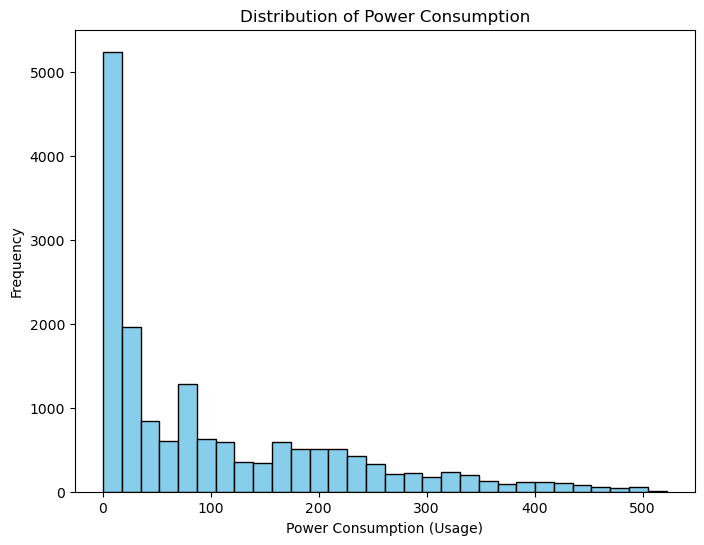

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df['Usage'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Power Consumption (Usage)')
plt.ylabel('Frequency')
plt.title('Distribution of Power Consumption')
plt.show()

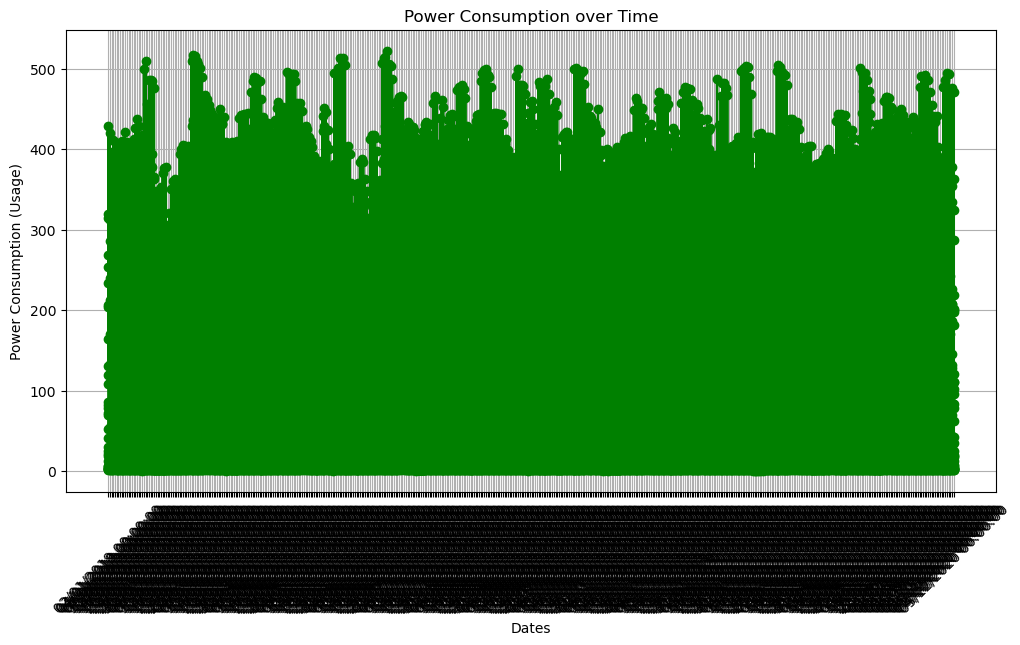

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Usage'], marker='o', linestyle='-', color='green')
plt.xlabel('Dates')
plt.ylabel('Power Consumption (Usage)')
plt.title('Power Consumption over Time')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [17]:
print(df['States'].unique())

['Punjab' 'Haryana' 'Rajasthan' 'Delhi' 'UP' 'Uttarakhand' 'HP' 'J&K'
 'Chandigarh' 'Chhattisgarh' 'Gujarat' 'MP' 'Maharashtra' 'Goa' 'DNH'
 'Andhra Pradesh' 'Telangana' 'Karnataka' 'Kerala' 'Tamil Nadu' 'Pondy'
 'Bihar' 'Jharkhand' 'Odisha' 'West Bengal' 'Sikkim' 'Arunachal Pradesh'
 'Assam' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Tripura']


In [18]:
print(df['Regions'].unique())

['NR' 'WR' 'SR' 'ER' 'NER']


In [41]:
X = df_encoded.drop('Usage', axis=1)
y = df_encoded['Usage']

In [42]:
scaler = StandardScaler()
numerical_columns_to_scale = ['longitude']
X_train[numerical_columns_to_scale] = scaler.fit_transform(X_train[numerical_columns_to_scale])
X_test[numerical_columns_to_scale] = scaler.transform(X_test[numerical_columns_to_scale])

In [43]:
df_encoded['Dates'] = pd.to_datetime(df_encoded['Dates'])  # Convert 'Dates' to datetime format
df_encoded['DayOfWeek'] = df_encoded['Dates'].dt.dayofweek  # Extract the day of the week (0: Monday, 6: Sunday)
df_encoded['Month'] = df_encoded['Dates'].dt.month  # Extract the month (1: January, 12: December)
df_encoded['Season'] = (df_encoded['Dates'].dt.month % 12 + 3) // 3  # Calculate the season (1: winter, 2: spring, 3: summer, 4: fall)


In [44]:
df_encoded.drop('Dates', axis=1, inplace=True)

In [45]:
X = df_encoded.drop('Usage', axis=1)  # Features (all columns except 'Usage')
y = df_encoded['Usage']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [77]:
# Assuming 'States' and 'Regions' are categorical columns
df_encoded = pd.get_dummies(df, columns=['States', 'Regions'], drop_first=True)


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 13.786891950713361
Mean Squared Error: 601.4402625001121
R-squared: 0.9559948250363905


In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Create the LinearRegression model
model = LinearRegression()

# Define the hyperparameters to tune and their respective values
param_grid = {
    'fit_intercept': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)

# Fit the GridSearchCV object on the training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the entire training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Model evaluation using evaluation metrics (MAE, MSE, R2) with the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Best Hyperparameters: {'fit_intercept': True}
Mean Absolute Error: 13.786891950713361
Mean Squared Error: 601.4402625001121
R-squared: 0.9559948250363905


In [81]:
import joblib

# Assuming 'best_model' is the trained and fine-tuned model
# Save the model to a file
joblib.dump(best_model, 'trained_model.joblib')

# Later, when deploying the model:
# Load the model from the file 
loaded_model = joblib.load('trained_model.joblib')

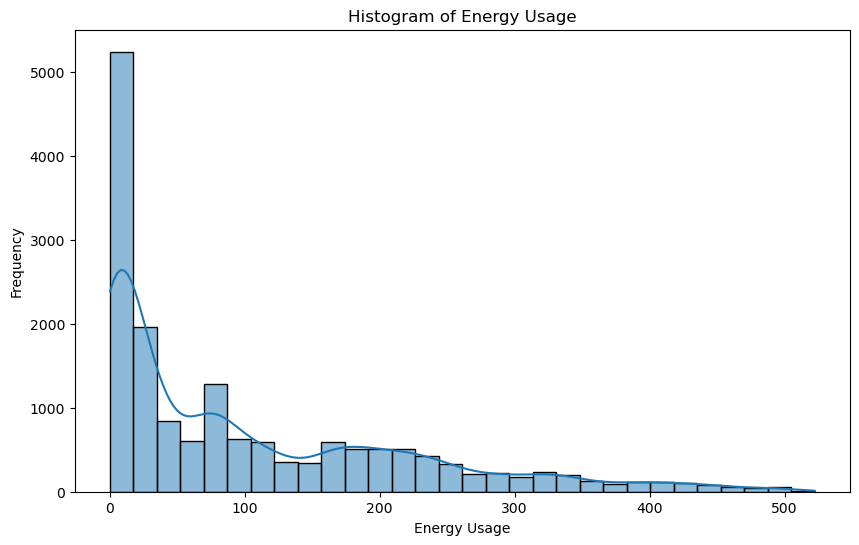

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualization 1: Histogram of Energy Usage
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Usage', bins=30, kde=True)
plt.xlabel('Energy Usage')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Usage')
plt.show()

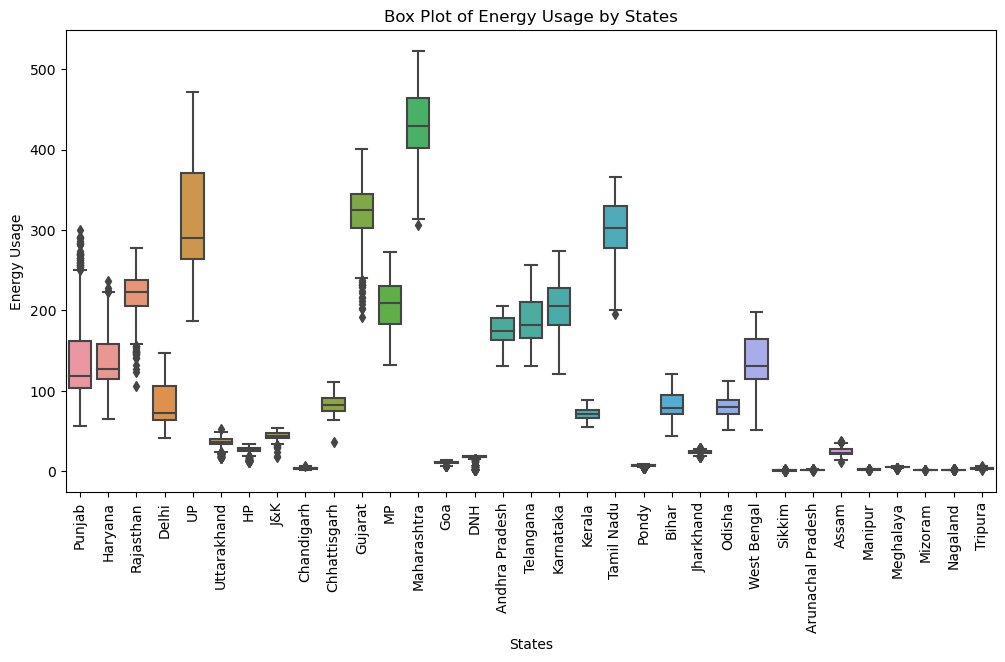

In [83]:
# Visualization 2: Box Plot of Energy Usage by States
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='States', y='Usage')
plt.xlabel('States')
plt.ylabel('Energy Usage')
plt.title('Box Plot of Energy Usage by States')
plt.xticks(rotation=90)
plt.show()

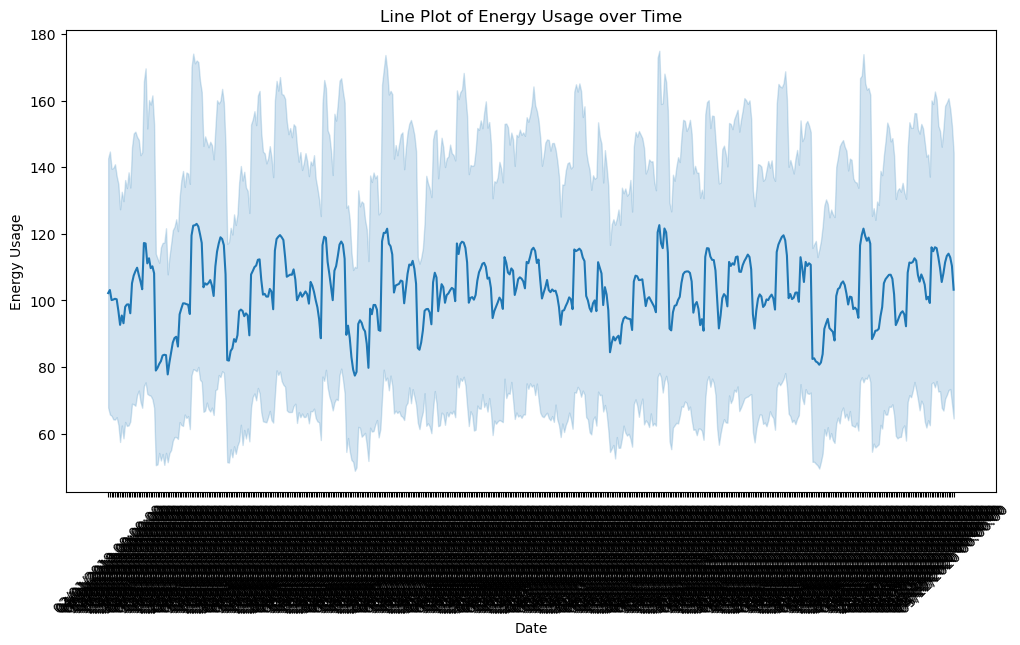

In [84]:
# Visualization 3: Line Plot of Energy Usage over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Dates', y='Usage')
plt.xlabel('Date')
plt.ylabel('Energy Usage')
plt.title('Line Plot of Energy Usage over Time')
plt.xticks(rotation=45)
plt.show()

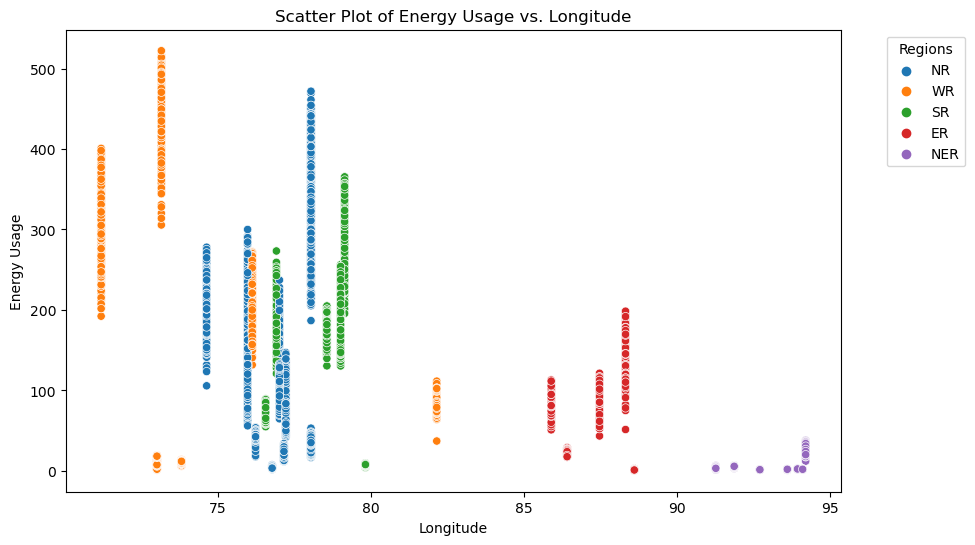

In [85]:
# Visualization 4: Scatter Plot of Energy Usage vs. Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='longitude', y='Usage', hue='Regions')
plt.xlabel('Longitude')
plt.ylabel('Energy Usage')
plt.title('Scatter Plot of Energy Usage vs. Longitude')
plt.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

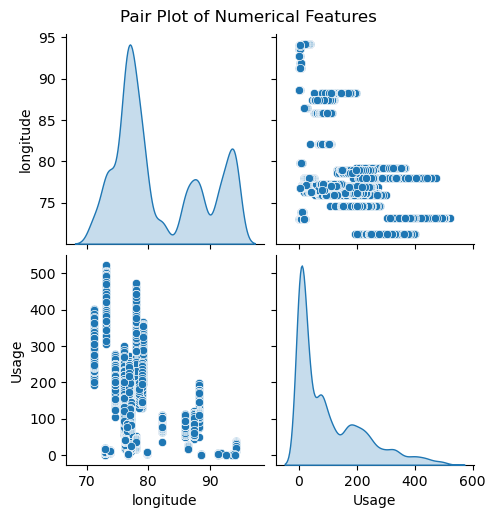

In [86]:
# Visualization 5: Pair Plot of Numerical Features
sns.pairplot(df[['longitude', 'Usage']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_21904\2431088422.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Regions', y='Usage', ci=None)


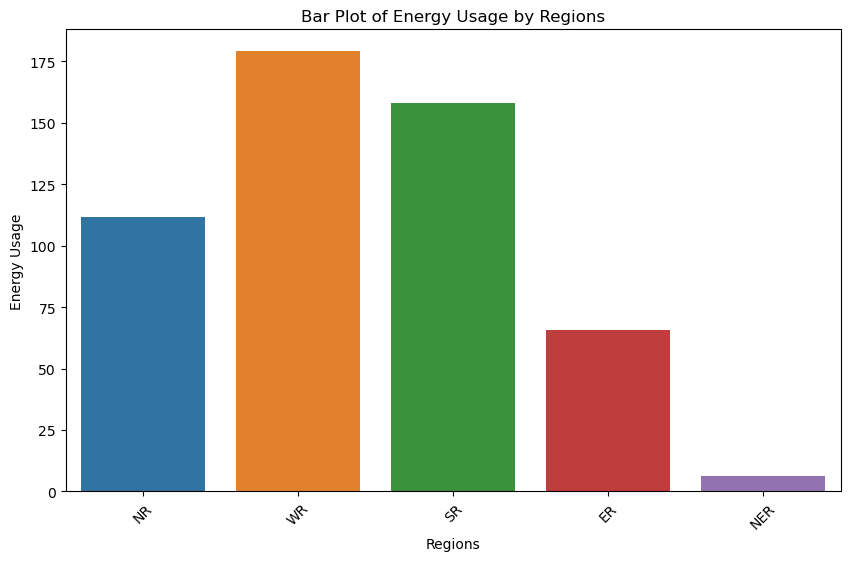

In [87]:
# Visualization 6: Bar Plot of Energy Usage by Regions
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Regions', y='Usage', ci=None)
plt.xlabel('Regions')
plt.ylabel('Energy Usage')
plt.title('Bar Plot of Energy Usage by Regions')
plt.xticks(rotation=45)
plt.show()

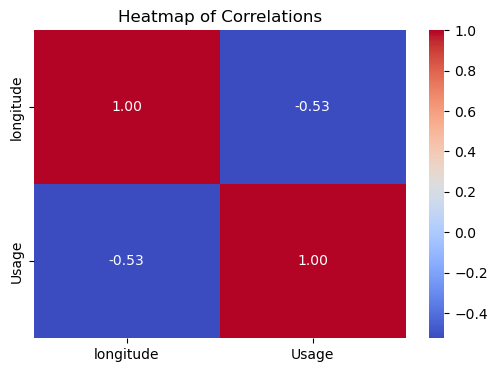

In [88]:
# Visualization 8: Heatmap of Correlations
# Select numerical columns for correlation analysis
numerical_columns = ['longitude', 'Usage']
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()


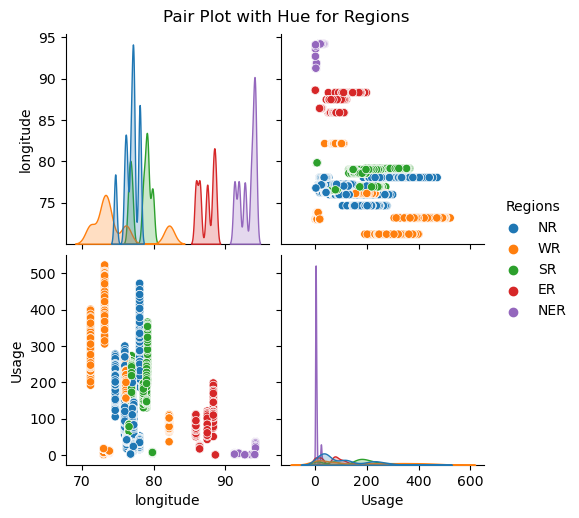

In [89]:
# Visualization 9: Pair Plot with Hue for Regions
sns.pairplot(df[['longitude', 'Usage', 'Regions']], hue='Regions', diag_kind='kde')
plt.suptitle('Pair Plot with Hue for Regions', y=1.02)
plt.show()